In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras import (
    layers,
    models,
    callbacks,
    losses,
    utils,
    metrics,
    optimizers,
    datasets,
)
import pickle
import tensorflow.keras.backend as K
from model import WaveGAN
import librosa as lb
from preprocess import load_raw_audio
from preprocess import denormalise
from IPython.lib.display import Audio

In [2]:
DIM = 64
CHANNELS = 1 #keeping as 1? what for mono or stereo?
PHASE_PARAM = 2
LATENT_DIM = 100
DISCRIMINATOR_STEPS = 5
GP_WEIGHT = 10
LEARNING_RATE = 1e-4
ADAM_BETA_1 = 0.5
ADAM_BETA_2 = 0.9
BATCH_SIZE = 64
EPOCHS = 5

model_directory ="C:/Users/Jayde/Desktop/wavegan/models_1811.1153"

In [3]:
wavegan = WaveGAN(
    latent_dim = LATENT_DIM,
    discriminator_steps= DISCRIMINATOR_STEPS,
    gp_weight= GP_WEIGHT,
)

In [5]:
generator = wavegan.generator
generator.load_weights(f"{model_directory}/generator")

In [20]:
z_sample = np.random.normal(size=(10, LATENT_DIM))
generated_audio = generator.predict(z_sample)

1/1 [==============================] - 1s 667ms/step


In [21]:
print(generated_audio.shape)
generated_audio= np.squeeze(generated_audio)
print(generated_audio.shape)

(10, 16384, 1)
(10, 16384)


In [22]:
audio = denormalise(generated_audio,f"{model_directory}/normaliser_values")

DENORMALISING- MEAN:-0.00011955657828366384, STD_DEV:0.09062005579471588
DENORMALISED


In [31]:
#audio_1 =generated_audio[1]
audio_1 =audio[9]
sr = 16000
Audio(audio_1, rate =sr)


Text(108.22222222222221, 0.5, 'Amplitude')

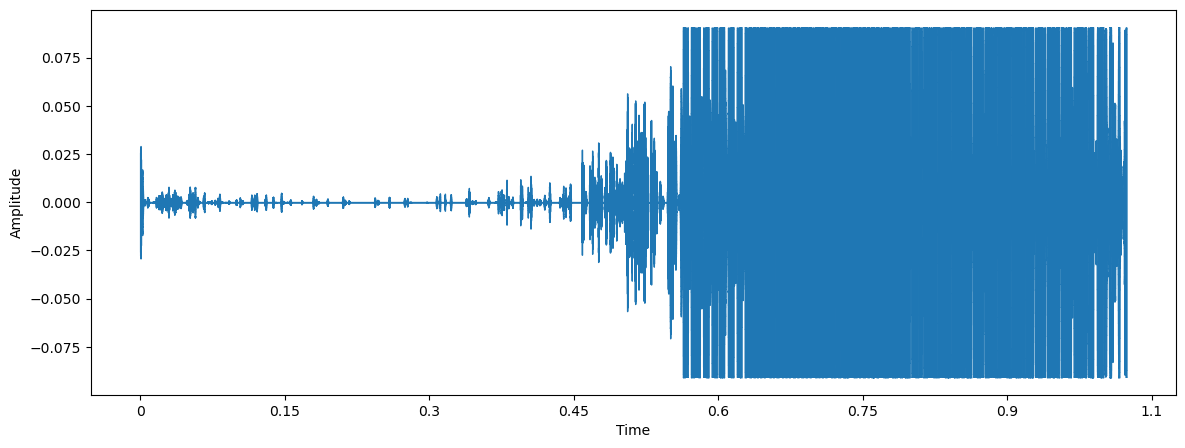

In [32]:
import librosa.display

plt.figure(figsize=(14, 5))
#plotting the sampled signal
librosa.display.waveshow(audio_1, sr=sr)
plt.ylabel("Amplitude")

In [53]:
from scipy.io.wavfile import write
write("example_audio4.wav", sr, audio_1)

In [14]:
%tensorboard

UsageError: Line magic function `%tensorboard` not found.
